# Building more recombination biocircuits
The goal of this notebook is to show how you can use the integrase and excisionase mechanisms characterized in this paper to build more complex DNA recombination based biological circuits. For more information on the modeling, data analysis, and characterization of the parts please refer to other relevant notebooks in this repository. 

## Model logic gates

Using the models from our paper, we can model recombinase based logic gates that have been discussed in the literature. An example is the AND logic gate circuit discussed in Merrick et al. 2018:


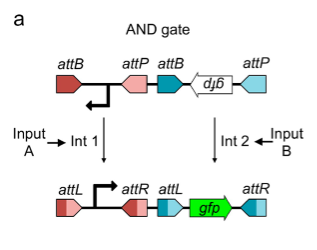


Merrick, Christine A., Jia Zhao, and Susan J. Rosser. "Serine integrases: advancing synthetic biology." ACS Synthetic Biology 7.2 (2018): 299-310.

In [2]:
from recombination_mechanisms import *

## Define parameters

In [3]:
parameters_dict = {("transcription_mm", "P_int1", "kb"):100, 
                   ("transcription_mm", "P_int1", "ku"):1,
                   ("transcription_mm", "P_int1", "ktx"):0.25,
                   ("transcription_mm", "P_int2", "kb"):100, 
                   ("transcription_mm", "P_int2", "ku"):1,
                   ("transcription_mm", "P_int2", "ktx"):0.25,
                   ("translation_mm", "RBS", "kb"):100, 
                   ("translation_mm", "RBS", "ku"):1,
                   ("translation_mm", "RBS", "ktl"):0.013,
                   ("translation_mm", "RBS1", "kb"):100, 
                   ("translation_mm", "RBS1", "ku"):1,
                   ("translation_mm", "RBS1", "ktl"):0.013,
                   ("translation_mm", "RBS2", "kb"):80, 
                   ("translation_mm", "RBS2", "ku"):2,
                   ("translation_mm", "RBS2", "ktl"):0.05,
                   ("transcription_mm", "P_A", "kb"):80, 
                   ("transcription_mm", "P_A", "ku"):2,
                   ("transcription_mm", "P_A", "ktx"):0.4,
                   ("rna_degredation_mm", "rna_T_int1", "kb"):20,
                   ("rna_degredation_mm", "rna_T_int1", "ku"):2,
                   ("rna_degredation_mm", "rna_T_int2", "kb"):20,
                   ("rna_degredation_mm", "rna_T_int2", "ku"):2,
                   ("rna_degredation_mm", "rna_T_gfp", "kb"):10,
                   ("rna_degredation_mm", "rna_T_gfp", "ku"):2,
                   ("rna_degredation_mm", "rna_T_int1", "kdeg"):0.005,
                   ("rna_degredation_mm", "rna_T_int2", "kdeg"):0.005,
                   ("rna_degredation_mm", "rna_T_gfp", "kdeg"):0.001,
                   ("rna_degredation_mm", "complex_protein_Ribo_rna_T_int1_", "kb"): 20,
                   ("rna_degredation_mm", "complex_protein_Ribo_rna_T_int1_", "ku"): 2,
                   ("rna_degredation_mm", "complex_protein_Ribo_rna_T_int1_", "kdeg"): 0.005,
                   ("rna_degredation_mm", "complex_protein_Ribo_rna_T_int2_", "kb"): 20,
                   ("rna_degredation_mm", "complex_protein_Ribo_rna_T_int2_", "ku"): 2,
                   ("rna_degredation_mm", "complex_protein_Ribo_rna_T_int2_", "kdeg"): 0.005,
                   ("rna_degredation_mm", "complex_protein_Ribo_rna_T_gfp_", "kb"): 10,
                   ("rna_degredation_mm", "complex_protein_Ribo_rna_T_gfp_", "ku"): 2,
                   ("rna_degredation_mm", "complex_protein_Ribo_rna_T_gfp_", "kdeg"): 0.005
                   }

# Measures E.coli extract endogenous mRNA degradation:
# https://jbioleng.biomedcentral.com/track/pdf/10.1186/1754-1611-4-9.pdf

In [4]:
# Integrase binding to DNA
a_i = ParameterEntry("a_i", 10)
# Integrase unbinding DNA
d_i = ParameterEntry("d_i", 1)

# Integrase flipping rate
k_int = ParameterEntry("k_int", 0.1)

# Integrase-attL_attR complex unbinding to form attL_attR and Integrase
a_r = ParameterEntry("a_r", 0.033)
# Binding of attL_attR and I to form Integrase-attL_attR complex 
d_r = ParameterEntry("d_r", 0.5)

parameters_integrase1 = {'a_i':a_i, 'd_i':d_i, 'k_int':k_int, 'a_r':a_r, 'd_r':d_r}
parameters_integrase2 = {'a_i':a_i, 'd_i':d_i, 'k_int':k_int, 'a_r':a_r, 'd_r':d_r}

G_int1 = DNAassembly("G_int1", promoter = "P_int1", rbs = "RBS1", transcript = "T_int1", protein = "Int1")
G_int2 = DNAassembly("G_int2", promoter = "P_int2", rbs = "RBS2", transcript = "T_int2", protein = "Int2")
G = DNAassembly("attL_attR_attL_attR", promoter = "P_A", rbs = "RBS", transcript = "T_gfp", protein = "gfp")
U0 = Species("attP_attB_attP_attB", material_type = "dna")
U = Species("attL_attR_attP_attB", material_type = "dna")
I1_mech = IntegraseFlipper()
I1 = IntegraseSite(integrase = G_int1.protein, curr_dna = U0, reversed_dna = U,  
                   cooperativity = 2, parameter_dict = parameters_integrase1,
                   mechanism = I1_mech)
I2_mech = IntegraseFlipper()
I2 = IntegraseSite(integrase = G_int2.protein, curr_dna = U, reversed_dna = G.dna,  
                   cooperativity = 2, parameter_dict = parameters_integrase2,
                   mechanism = I2_mech)
M = TxTlMixture("Gene_Expr_Mix", components = [G_int1, G_int2, I1, I2, G], 
                 parameters = parameters_dict)
CRN = M.compile_crn()
CRN.add_species(U0)
CRN.add_species(U)
CRN.write_sbml_file("recombinase_and_gate.xml")

/usr/local/python/3.10.4/lib/python3.10/random.py:370: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  return self.randrange(a, b+1)


True

In [5]:
CRN

Species = dna_G_int1, protein_RNAP, rna_T_int1, complex_dna_G_int1_protein_RNAP_, protein_Ribo, protein_Int1, complex_protein_Ribo_rna_T_int1_, dna_G_int2, rna_T_int2, complex_dna_G_int2_protein_RNAP_, protein_Int2, complex_protein_Ribo_rna_T_int2_, dna_attP_attB_attP_attB, dna_attL_attR_attP_attB, complex_dna_attP_attB_attP_attB_protein_Int1_2x_, complex_dna_attL_attR_attP_attB_protein_Int1_2x_, dna_attL_attR_attL_attR, complex_dna_attL_attR_attP_attB_protein_Int2_2x_, complex_dna_attL_attR_attL_attR_protein_Int2_2x_, rna_T_gfp, complex_dna_attL_attR_attL_attR_protein_RNAP_, protein_gfp, complex_protein_Ribo_rna_T_gfp_, protein_RNAase, complex_protein_RNAase_rna_T_int1_, complex_complex_protein_Ribo_rna_T_int1__protein_RNAase_, complex_protein_RNAase_rna_T_int2_, complex_complex_protein_Ribo_rna_T_int2__protein_RNAase_, complex_protein_RNAase_rna_T_gfp_, complex_complex_protein_Ribo_rna_T_gfp__protein_RNAase_
Reactions = [
	dna[G_int1]+protein[RNAP] <--> complex[dna[G_int1]:protein[RN

In [6]:
print(CRN.species)

[dna_G_int1, protein_RNAP, rna_T_int1, complex_dna_G_int1_protein_RNAP_, protein_Ribo, protein_Int1, complex_protein_Ribo_rna_T_int1_, dna_G_int2, rna_T_int2, complex_dna_G_int2_protein_RNAP_, protein_Int2, complex_protein_Ribo_rna_T_int2_, dna_attP_attB_attP_attB, dna_attL_attR_attP_attB, complex_dna_attP_attB_attP_attB_protein_Int1_2x_, complex_dna_attL_attR_attP_attB_protein_Int1_2x_, dna_attL_attR_attL_attR, complex_dna_attL_attR_attP_attB_protein_Int2_2x_, complex_dna_attL_attR_attL_attR_protein_Int2_2x_, rna_T_gfp, complex_dna_attL_attR_attL_attR_protein_RNAP_, protein_gfp, complex_protein_Ribo_rna_T_gfp_, protein_RNAase, complex_protein_RNAase_rna_T_int1_, complex_complex_protein_Ribo_rna_T_int1__protein_RNAase_, complex_protein_RNAase_rna_T_int2_, complex_complex_protein_Ribo_rna_T_int2__protein_RNAase_, complex_protein_RNAase_rna_T_gfp_, complex_complex_protein_Ribo_rna_T_gfp__protein_RNAase_]


## Simulate the AND gate

To simulate the model, install bioscrape by running `pip install bioscrape` in your terminal. [Bioscrape](https://github.com/biocircuits/bioscrape/) is a fast Cython-based simulator for SBML models.

In [7]:
from bioscrape.types import Model 
from bioscrape.simulator import DeterministicSimulator, ModelCSimInterface, py_simulate_model
import numpy as np
m = Model(sbml_filename = 'recombinase_and_gate.xml')
# Set resource levels
RNAP = 200
Ribo = 400
RNAase = 30
m.set_species({"protein_RNAP": RNAP, "protein_Ribo": Ribo, "protein_RNAase":RNAase})

In [21]:
# Simulate 
timepoints = np.linspace(0,600,600)
simdata = {}
int1_levels = [0,1.]
int2_levels = [0,1.]
num_integrase1_conditions = len(int1_levels)
rep_nm = 1
num_integrase2_conditions = len(int2_levels)
for int1_nm in int1_levels:
    for int2_nm in int2_levels:
        m.set_species({"dna_G_int1": int1_nm, "dna_G_int2": int2_nm, "dna_attP_attB_attP_attB": rep_nm})
        simulation_result = py_simulate_model(Model = m, timepoints = timepoints)
        simdata[(int1_nm,int2_nm,'gfp')] = simulation_result['protein_gfp']

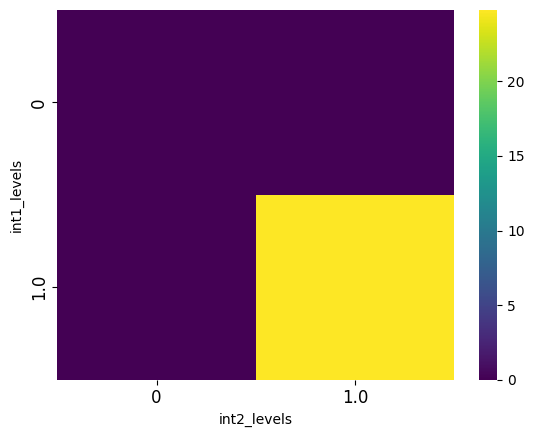

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = []

for int1_ind in range(len(int1_levels)):
    row_data = []
    for int2_ind in range(len(int2_levels)):
        data = np.array(simdata[(int1_levels[int1_ind], int2_levels[int2_ind], 'gfp')])[-1]
        row_data.append(data)
    heatmap_data.append(row_data)

ax = sns.heatmap(heatmap_data, cmap='viridis', xticklabels=int2_levels, yticklabels=int1_levels)
ax.set_xlabel('int2_levels')
ax.set_ylabel('int1_levels')
ax.tick_params(labelsize=12)
plt.show()


## Model multiple integrase and excisionase driven state machine